In [14]:
import json

target_epoch = 3.0

#with open("huggingface-train-5-epochs.txt", "r") as f:
#with open("huggingface-train-3-epochs-notriage.txt", "r") as f:
with open("firefox-hf-8-iterations.txt", "r") as f:
#with open("huggingface-train-1.txt", "r") as f:
    log_text = f.read()

iterations = 0
best_loss = 100
best_epoch = 0
best_accuracy = 0
best_losses = []
best_accuracies = []
best_epochs = []
for line in log_text.splitlines():
    if line.startswith("{'eval_loss':"):
        line = line.replace("'", '"')
        line_json = json.loads(line)
        #print(line_json["eval_loss"])
        epoch = float(line_json["epoch"])
        eval_loss = float(line_json["eval_loss"])
        accuracy = float(line_json["eval_accuracy"])
        if eval_loss < best_loss:
            best_loss = eval_loss
            best_epoch = epoch
            best_accuracy = accuracy
        if epoch == target_epoch:
            iterations += 1
            best_losses.append(best_loss)
            best_epochs.append(best_epoch)
            best_accuracies.append(best_accuracy)
            print(f"iteration {iterations}: best_loss={best_loss}, best_epoch={best_epoch}, best_accuracy={best_accuracy}")
            best_loss = 100
            best_epoch = 0
            best_accuracy = 0


iteration 1: best_loss=0.8492729139028106, best_epoch=1.9666972597351515, best_accuracy=0.7444313417190775
iteration 2: best_loss=0.8436738020219143, best_epoch=1.9666972597351515, best_accuracy=0.7503603249475891
iteration 3: best_loss=0.8421799121912671, best_epoch=1.9011406844106464, best_accuracy=0.7497707023060797
iteration 4: best_loss=0.84584854733769, best_epoch=2.0322538350596564, best_accuracy=0.7502292976939203
iteration 5: best_loss=0.8386523488682521, best_epoch=1.9666972597351515, best_accuracy=0.7502292976939203
iteration 6: best_loss=0.8406639498984538, best_epoch=1.8355841090861413, best_accuracy=0.7471501572327044
iteration 7: best_loss=0.8319232548807652, best_epoch=1.9666972597351515, best_accuracy=0.7524240041928721
iteration 8: best_loss=0.8539809380937172, best_epoch=2.2289235610331715, best_accuracy=0.7512775157232704
iteration 9: best_loss=0.8261994495831696, best_epoch=1.9666972597351515, best_accuracy=0.754651467505241
iteration 10: best_loss=0.84602199210560

In [15]:
import pandas as pd

df = pd.DataFrame()
df["epoch"] = best_epochs
df["loss"] = best_losses
df["accuracy"] = best_accuracies


In [16]:
df

,epoch,loss,accuracy
0,1.966697,0.849273,0.744431
1,1.966697,0.843674,0.750360
2,1.901141,0.842180,0.749771
3,2.032254,0.845849,0.750229
4,1.966697,0.838652,0.750229
5,1.835584,0.840664,0.747150
6,1.966697,0.831923,0.752424
7,2.228924,0.853981,0.751278
8,1.966697,0.826199,0.754651
9,1.966697,0.846022,0.752358


In [17]:
df.mean()

epoch       1.979809
loss        0.841842
accuracy    0.750288
dtype: float64

In [18]:
df.describe()

,epoch,loss,accuracy
count,10.000000,10.000000,10.000000
mean,1.979809,0.841842,0.750288
std,0.101560,0.008125,0.002854
min,1.835584,0.826199,0.744431
25%,1.966697,0.839155,0.749885
50%,1.966697,0.842927,0.750295
75%,1.966697,0.845979,0.752088
max,2.228924,0.853981,0.754651


In [19]:
import json

with open("huggingface-train-5-epochs.txt", "r") as f:
    log_text = f.read()

epochs = []
losses = []
accuracies = []
for line in log_text.splitlines():
    if line.startswith("{'eval_loss':"):
        line = line.replace("'", '"')
        line_json = json.loads(line)
        #print(line_json["eval_loss"])
        epoch = float(line_json["epoch"])
        eval_loss = float(line_json["eval_loss"])
        accuracy = float(line_json["eval_accuracy"])
        losses.append(eval_loss)
        epochs.append(epoch)
        accuracies.append(accuracy)


<AxesSubplot:xlabel='epoch'>

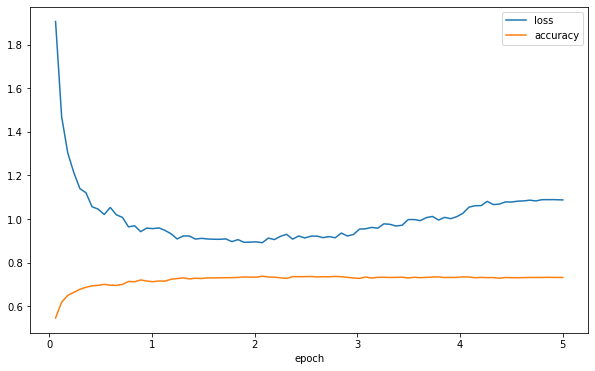

In [20]:
df2 = pd.DataFrame()
df2["epoch"] = epochs
df2["loss"] = losses
df2["accuracy"] = accuracies
df2 = df2.set_index("epoch")
df2.plot(figsize=(10,6))

In [21]:
import json

#with open("huggingface-train-3-epochs-notriage.txt", "r") as f:
with open("firefox-hf-8-iterations.txt", "r") as f:
#with open("huggingface-train-5-epochs.txt", "r") as f:
    log_text = f.read()

target_epoch = 3.0
epochs = []
losses = []
accuracies = []
for line in log_text.splitlines():
    if line.startswith("{'eval_loss':"):
        line = line.replace("'", '"')
        line_json = json.loads(line)
        #print(line_json["eval_loss"])
        epoch = float(line_json["epoch"])
        eval_loss = float(line_json["eval_loss"])
        accuracy = float(line_json["eval_accuracy"])
        losses.append(eval_loss)
        epochs.append(epoch)
        accuracies.append(accuracy)
        if epoch == target_epoch:
            break


<AxesSubplot:xlabel='epoch'>

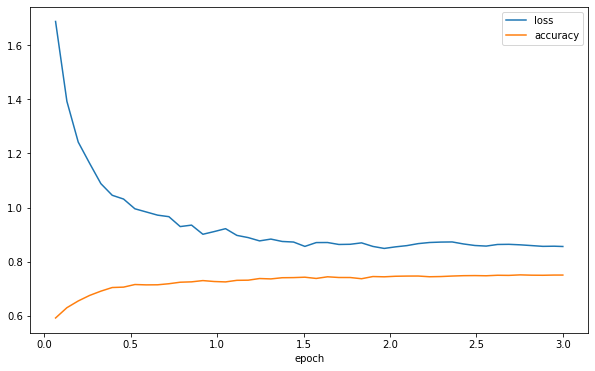

In [22]:
df2 = pd.DataFrame()
df2["epoch"] = epochs
df2["loss"] = losses
df2["accuracy"] = accuracies
df2 = df2.set_index("epoch")
df2.plot(figsize=(10,6))

In [23]:
#huggingface 10 runs, collected with log parser script
hug_top1_runs = [0.7533042246872788, 0.7523011564786406, 0.7479938635827236, 0.7528321925890961, 0.7555463771536465, 0.7514751003068209, 0.7558413972150106, 0.7593226339391078, 0.747521831484541, 0.7541302808590984]
hug_top5_runs = [0.9699669577531272, 0.972209110219495, 0.9700259617654, 0.9715010620722209, 0.9707930139249469, 0.9711470379985839, 0.9686688694831248, 0.9723271182440406, 0.9688458815199433, 0.9701439697899458]
hf_losses = best_losses
hf_accuracies = best_accuracies
hf_epochs = best_epochs

In [24]:
#keras lstm 10 runs, collected from training notebook(s)
keras_top1_runs = [0.7217354808247206, 0.7219453334032842, 0.7148103457321232, 0.7205288284979802, 0.7173810398195268, 0.7178007449766539, 0.7140233985625098, 0.7155972929017366, 0.7180630606998584, 0.7197943444730077]
keras_top5_runs = [0.963380725040659, 0.9613871255443052, 0.9581868737212108, 0.9624363884371229, 0.9603903257961283, 0.9613871255443052, 0.960967420387178, 0.9607051046639735, 0.9606526415193327, 0.9614920518335869]
keras_epochs = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
keras_losses = [0.91499, 0.92494, 0.92394, 0.92380, 0.92806, 0.92193, 0.91818, 0.92312, 0.91930, 0.92413]
keras_val_acc = [0.7220, 0.7191, 0.7191, 0.7172, 0.7174, 0.7227, 0.7207, 0.7214, 0.7214, 0.7186]

In [25]:
df3 = pd.DataFrame()
df3["hf1_test_acc"] = hug_top1_runs
df3["hf_best_epoch"] = hf_epochs
df3["hf_val_loss"] = hf_losses
df3["hf_val_acc"] = hf_accuracies
df3["hf5_test_acc"] = hug_top5_runs
df3["keras1_test_acc"] = keras_top1_runs
#df3["keras_best_epoch"] = keras_epochs
df3["k_val_loss"] = keras_losses
df3["k_val_acc"] = keras_val_acc
df3["k5_test_acc"] = keras_top5_runs


In [26]:
df3

,hf1_test_acc,hf_best_epoch,hf_val_loss,hf_val_acc,hf5_test_acc,keras1_test_acc,k_val_loss,k_val_acc,k5_test_acc
0,0.753304,1.966697,0.849273,0.744431,0.969967,0.721735,0.91499,0.7220,0.963381
1,0.752301,1.966697,0.843674,0.750360,0.972209,0.721945,0.92494,0.7191,0.961387
2,0.747994,1.901141,0.842180,0.749771,0.970026,0.714810,0.92394,0.7191,0.958187
3,0.752832,2.032254,0.845849,0.750229,0.971501,0.720529,0.92380,0.7172,0.962436
4,0.755546,1.966697,0.838652,0.750229,0.970793,0.717381,0.92806,0.7174,0.960390
5,0.751475,1.835584,0.840664,0.747150,0.971147,0.717801,0.92193,0.7227,0.961387
6,0.755841,1.966697,0.831923,0.752424,0.968669,0.714023,0.91818,0.7207,0.960967
7,0.759323,2.228924,0.853981,0.751278,0.972327,0.715597,0.92312,0.7214,0.960705
8,0.747522,1.966697,0.826199,0.754651,0.968846,0.718063,0.91930,0.7214,0.960653
9,0.754130,1.966697,0.846022,0.752358,0.970144,0.719794,0.92413,0.7186,0.961492


In [27]:
df3.describe()

,hf1_test_acc,hf_best_epoch,hf_val_loss,hf_val_acc,hf5_test_acc,keras1_test_acc,k_val_loss,k_val_acc,k5_test_acc
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.753027,1.979809,0.841842,0.750288,0.970563,0.718168,0.922239,0.719960,0.961099
std,0.003556,0.101560,0.008125,0.002854,0.001267,0.002809,0.003780,0.001940,0.001361
min,0.747522,1.835584,0.826199,0.744431,0.968669,0.714023,0.914990,0.717200,0.958187
25%,0.751682,1.966697,0.839155,0.749885,0.969982,0.716043,0.919958,0.718725,0.960666
50%,0.753068,1.966697,0.842927,0.750295,0.970468,0.717932,0.923460,0.719900,0.961177
75%,0.755192,1.966697,0.845979,0.752088,0.971413,0.720345,0.924083,0.721400,0.961466
max,0.759323,2.228924,0.853981,0.754651,0.972327,0.721945,0.928060,0.722700,0.963381


In [ ]:
!pip install transformers

In [1]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification, TFDistilBertForSequenceClassification
from transformers import TFTrainingArguments, TrainingArguments
from transformers import Trainer, TFTrainer


In [2]:
model_name = "distilbert-base-uncased"
model = TFDistilBertForSequenceClassification.from_pretrained(model_name, num_labels=47)


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'classifier', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [3]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  66362880  
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  36143     
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 66,989,615
Trainable params: 66,989,615
Non-trainable params: 0
_________________________________________________________________


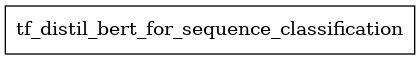

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(model)